## Install libraries if necessary

In [7]:


"""Comment out and run cell to install libraries"""
#!pip3 install ipympl
#!pip3 install ipywidgets
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install scipy
#!pip3 install pandas_datareader
#!pip3 install yfinance

'Comment out and run cell to install libraries'

## Import libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from datetime import date, timedelta
import yfinance as yahooFinance
import ipympl

## Functions to import price data and trading dates

In [9]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    price_series = stock_data.loc[:, 'Adj Close']
    price_series = price_series.fillna(method='ffill')

    return price_series

In [10]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    date_list = stock_data.index
    
    return date_list

## Import stock data

In [70]:
# Set time period
start_date = datetime.datetime(2019, 7, 1)
end_date = datetime.datetime(2022, 10, 1)
interval = 'd' # Date interval, by default daily ('d')

def getStockData(stock_symbol):
    # Import price series and list of trading days
    try:
        date_list = get_date_list(stock_symbol, start_date, end_date, interval=interval)

        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)


    except:
        print('Import failed for ', stock_symbol, "\n Retrying")
        date_list, price_series, date_list_per, stock_return, date_list_avg = getStockData(stock_symbol)

    print('Import Successful for ', stock_symbol)
    return date_list, price_series

def getDailyReturns(stock_symbol):
    try:
        date_list_per = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(1), interval=interval)
        date_list_avg = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(2), interval=interval)

        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)

        length = len(price_series)
        stock_return = []
        for(x) in range(length - 1):
            day_return_stock = ((price_series[x + 1] - price_series[x]) / price_series[x])
            stock_return.append(day_return_stock)
    except:
        print('Import failed for ', stock_symbol, "\n Retrying")
        date_list_per, stock_return, date_list_avg = getDailyReturns(stock_symbol)

    print('Import Successful for ', stock_symbol)
    return date_list_per, stock_return, date_list_avg

def averageDailyReturn(returns):
    avg_return = []
    count = len(returns)
    length = len(returns[0])
    for(x) in range(length - 1):
        day_sum_return = 0
        for (r) in returns:
            day_sum_return += r[x]
        day_avg_return = day_sum_return/count
        avg_return.append(day_avg_return)
    return avg_return


## Plot price series with annotations

/var/folders/f2/0m6wft7s4tn3fv8n8bzj5krc0000gn/T/ipykernel_2116/3469814074.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Import Successful for  DNNGY
Import Successful for  IBDRY
Import Successful for  RWE.DE
Import Successful for  SHEL
Import Successful for  UNPRF
Import Successful for  TTE
Import Successful for  BP


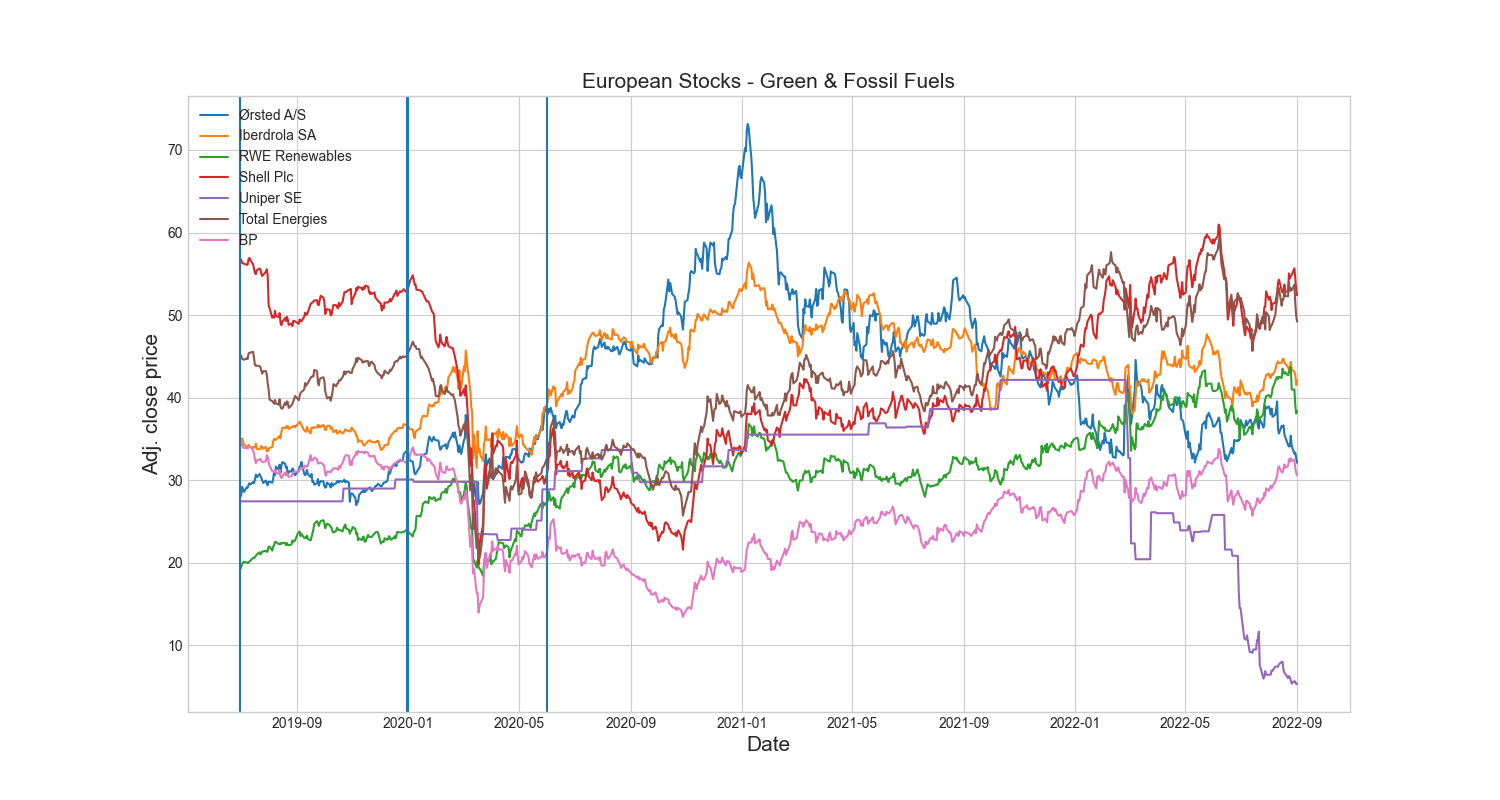

In [88]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('European Stocks - Green & Fossil Fuels', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# Green Stocks
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")

plt.plot(ØrstedData[0], ØrstedData[1], label="Ørsted A/S")
plt.plot(IberdrolaData[0], IberdrolaData[1], label="Iberdrola SA")
plt.plot(RWEData[0], RWEData[1], label="RWE Renewables")

# Fossil Fuel Stocks
ShellData = getStockData("SHEL")
UniperData = getStockData("UNPRF")
TotalData = getStockData("TTE")
BPData = getStockData("BP")

plt.plot(ShellData[0], ShellData[1], label="Shell Plc")
plt.plot(UniperData[0], UniperData[1], label="Uniper SE")
plt.plot(TotalData[0], TotalData[1], label="Total Energies")
plt.plot(BPData[0], BPData[1], label="BP")
plt.axvline(datetime.datetime(2019, 7, 1),0,80)
plt.axvline(datetime.datetime(2019, 12, 31),0,80)
plt.axvline(datetime.datetime(2020, 1, 1),0,80)
plt.axvline(datetime.datetime(2020, 6, 1),0,80)

# plt.ion()
plt.legend()
plt.show()

/var/folders/f2/0m6wft7s4tn3fv8n8bzj5krc0000gn/T/ipykernel_2116/2455120622.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Import Successful for  FSLR
Import Successful for  SPWR
Import Successful for  NEE
Import Successful for  CWEN
Import Successful for  MPC
Import Successful for  XOM
Import Successful for  OKE
Import Successful for  VLO
Import Successful for  PSX


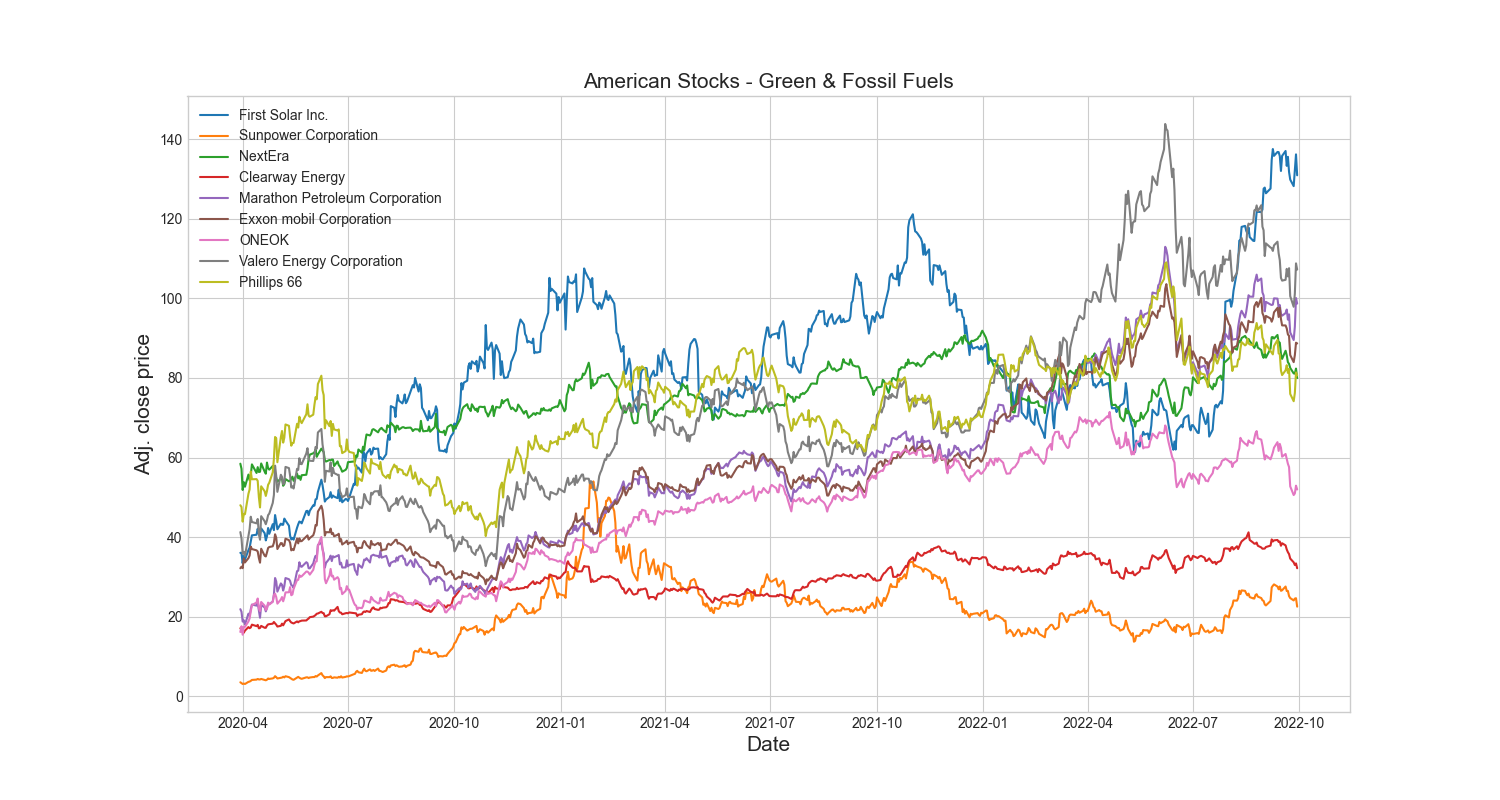

In [13]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American Stocks - Green & Fossil Fuels', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# Green Stocks
FirstSolarData = getStockData("FSLR")
SunPowerData = getStockData("SPWR")
NEData = getStockData("NEE")
ClearwayData = getStockData("CWEN")

plt.plot(FirstSolarData[0], FirstSolarData[1], label="First Solar Inc.")
plt.plot(SunPowerData[0], SunPowerData[1], label="Sunpower Corporation")
plt.plot(NEData[0], NEData[1], label="NextEra")
plt.plot(ClearwayData[0], ClearwayData[1], label="Clearway Energy")

# Fossil Fuel Stocks
MPCDATA = getStockData("MPC")
ExxonData = getStockData("XOM")
ONEOKData = getStockData("OKE")
ValData = getStockData("VLO")
PhilData = getStockData("PSX")

plt.plot(MPCDATA[0], MPCDATA[1], label="Marathon Petroleum Corporation")
plt.plot(ExxonData[0], ExxonData[1], label="Exxon mobil Corporation")
plt.plot(ONEOKData[0], ONEOKData[1], label="ONEOK")
plt.plot(ValData[0], ValData[1], label="Valero Energy Corporation")
plt.plot(PhilData[0], PhilData[1], label="Phillips 66")

plt.legend()
plt.show()

In [14]:
#Make Events
def getIndex(yyyy, m, d, date_list):
   index = "none"
   while index == "none":
       for x in range(len(date_list)):
          if (date_list[x] == datetime.datetime(yyyy, m, d)):
              index = x
              break
          elif datetime.datetime(yyyy, m, d) <= date_list[0]:
               return 0
       d -= 1
       if d == 0:
           d = 28
           m -= 1
           if m == 0:
               m = 12
               yyyy -= 1
   return index


def makeEvent(yyyy, m, d, text, ax, date_list, price_series):
   index = getIndex(yyyy, m, d, date_list)
   ax.annotate(text,
           xy=(date_list[index], price_series[index]),
           xycoords='data',
           bbox=dict(boxstyle="square", fc="none", ec="gray"),
           xytext=(0, 80),
           textcoords='offset points',
           arrowprops=dict(arrowstyle='->', color='gray'),
           va='center',
           ha='left',
           fontsize=8)

/var/folders/f2/0m6wft7s4tn3fv8n8bzj5krc0000gn/T/ipykernel_2116/2127079042.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Import Successful for  DNNGY
Import Successful for  IBDRY
Import Successful for  RWE.DE
Import Successful for  ^GSPC
Import Successful for  SHEL
Import Successful for  UNPRF
Import Successful for  TTE
Import Successful for  BP


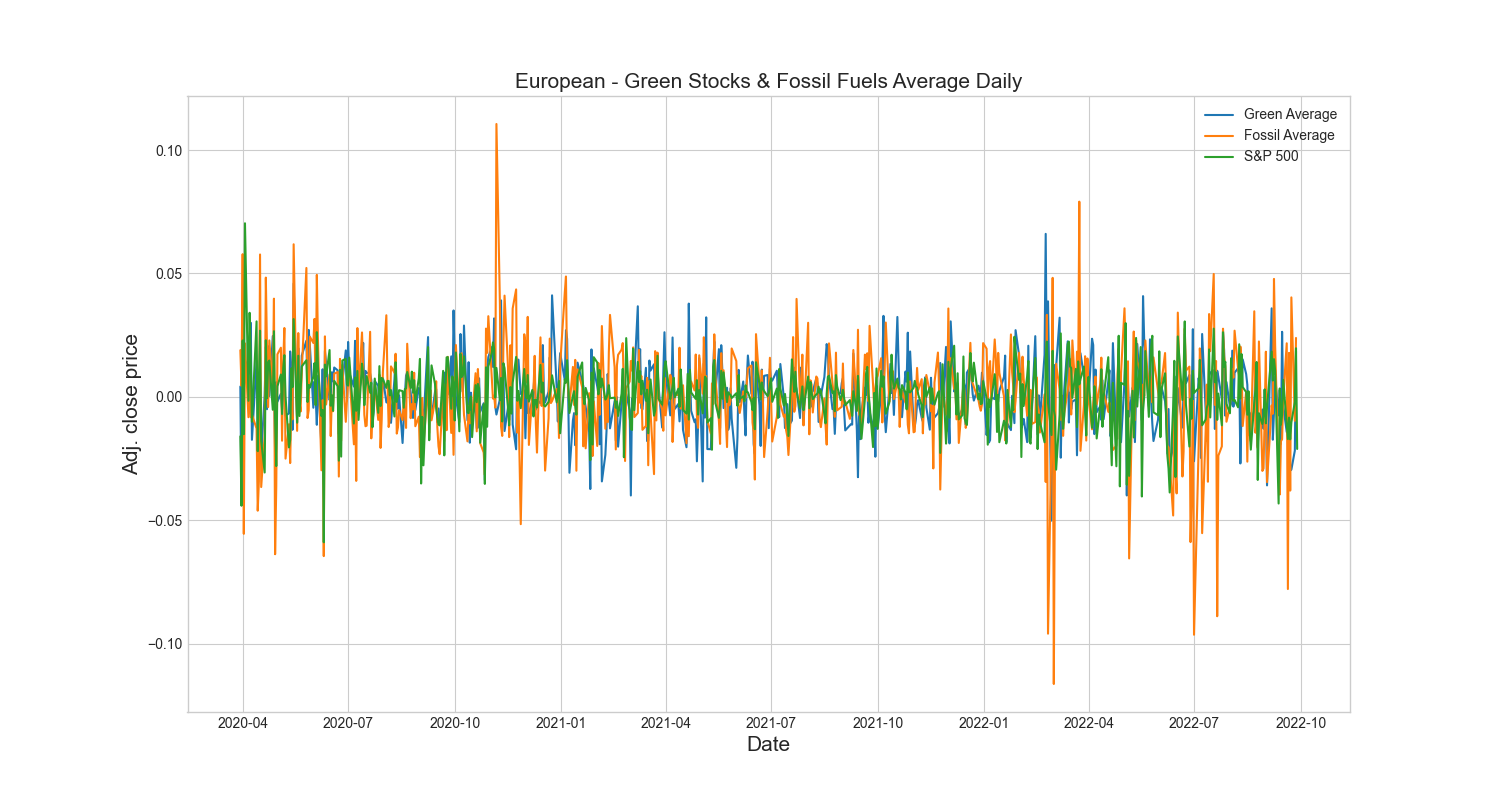

In [15]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax2 = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('European - Green Stocks & Fossil Fuels Average Daily', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
ØrstedData = getDailyReturns("DNNGY")
IberdrolaData = getDailyReturns("IBDRY")
RWEData = getDailyReturns("RWE.DE")

S_PData = getDailyReturns("^GSPC")

ShellData = getDailyReturns("SHEL")
UniperData = getDailyReturns("UNPRF")
TotalData = getDailyReturns("TTE")
BPData = getDailyReturns("BP")



averageGreenReturn = averageDailyReturn([ØrstedData[1], IberdrolaData[1], RWEData[1]])
averageFossilReturn = averageDailyReturn([ShellData[1], UniperData[1], TotalData[1], BPData[1]])

plt.plot(ØrstedData[2], averageGreenReturn, label="Green Average")
plt.plot(ShellData[2], averageFossilReturn, label="Fossil Average")
plt.plot(S_PData[0], S_PData[1], label="S&P 500")
plt.legend()
plt.show()

/var/folders/f2/0m6wft7s4tn3fv8n8bzj5krc0000gn/T/ipykernel_2116/2048225589.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Import Successful for  FSLR
Import Successful for  SPWR
Import Successful for  NEE
Import Successful for  CWEN
Import Successful for  MPC
Import Successful for  XOM
Import Successful for  OKE
Import Successful for  VLO
Import Successful for  PSX
Import Successful for  ^GSPC


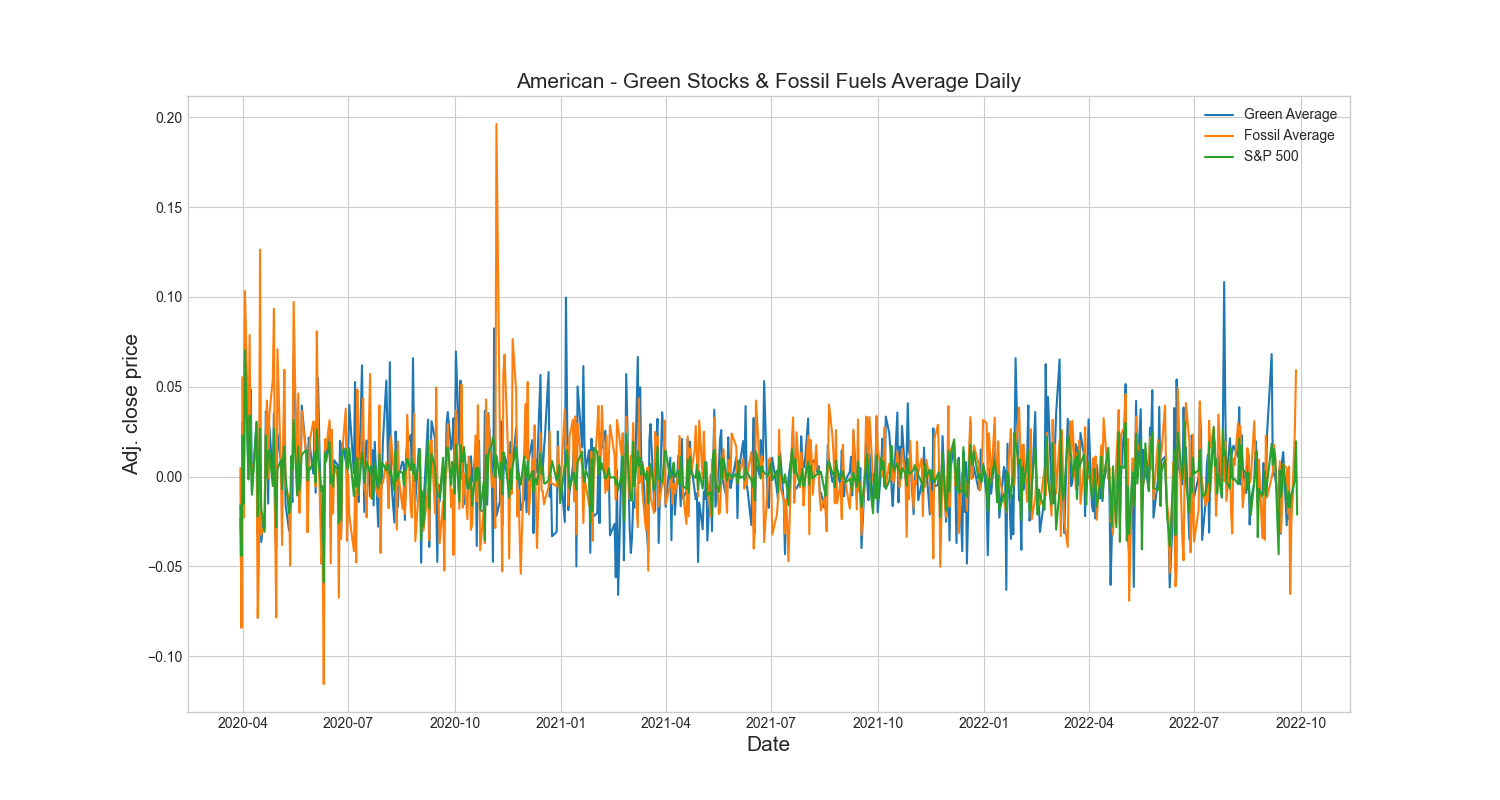

In [16]:
%matplotlib widget

fig, ax2 = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American - Green Stocks & Fossil Fuels Average Daily', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})


#GREEN STOCKS
FirstSolarData = getDailyReturns("FSLR")
SunPowerData = getDailyReturns("SPWR")
NEData = getDailyReturns("NEE")
ClearwayData = getDailyReturns("CWEN")

#FOSSIL FUEL STOCKS
MPCDATA = getDailyReturns("MPC")
ExxonData = getDailyReturns("XOM")
ONEOKData = getDailyReturns("OKE")
ValData = getDailyReturns("VLO")
PhilData = getDailyReturns("PSX")

#S&P
S_PData = getDailyReturns("^GSPC")


averageGreenReturn = averageDailyReturn([FirstSolarData[1], SunPowerData[1], NEData[1],ClearwayData[1]])
averageFossilReturn = averageDailyReturn([MPCDATA[1], ExxonData[1], ONEOKData[1], ValData[1],PhilData[1]])

plt.plot(FirstSolarData[2], averageGreenReturn, label="Green Average")
plt.plot(MPCDATA[2], averageFossilReturn, label="Fossil Average")
plt.plot(S_PData[0], S_PData[1], label="S&P 500")
plt.legend()
plt.show()

In [86]:
fig, ax2 = plt.subplots(figsize=(15, 8))
def getBeta(stock_symbol, date_end):
    index_symbol = "^GSPC" # Index symbol (by default "^GSPC" for the S&P500 index)

    # Generate list of trading days

    interval = 'd' # Date interval, by default daily ('d')
    date_list = get_date_list(index_symbol, start_date - timedelta(days=730), date_end, interval=interval)

    # Generate empty dataframe
    column_header_index = "Index price ({})".format(index_symbol)
    column_header_stock = "Stock price ({})".format(stock_symbol)
    df = pd.DataFrame(
            columns=[column_header_index, column_header_stock], index=date_list
        )

    # Sort dataframe based on date
    df = df.sort_index(ascending=False)

    # Import price series into dataframe
    try:
        index_price_series = read_price_data(index_symbol, start_date - timedelta(days=730), date_end, interval=interval)
        df[column_header_index] = index_price_series

        stock_price_series = read_price_data(stock_symbol, start_date - timedelta(days=730), date_end, interval=interval)
        df[column_header_stock] = stock_price_series

        stockTicker = yahooFinance.Ticker(stock_symbol)
        yahooStockBeta = stockTicker.info["beta"]

    except Exception as e: print(e)



    length = len(index_price_series)
    stock_return = []
    index_return = []
    for(x) in range(length - 1):
        day_return_index = (index_price_series[x + 1] - index_price_series[x]) / index_price_series[x]
        index_return.append(day_return_index)
        day_return_stock = (stock_price_series[x + 1] - stock_price_series[x]) / stock_price_series[x]
        stock_return.append(day_return_stock)

    import matplotlib.pyplot as plt




    betasList=[]
    z=0
    while(z+730<len(stock_return)):
        index_returnSplit = index_return[z:730+z]
        stock_returnSplit = stock_return[z:730+z]

        x1 = np.array(index_returnSplit)
        y1 = np.array(stock_returnSplit)
        #obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x1, y1, 1)

        betasList.append(m)
        z=+1

    print(len(betasList))
    betasList = betasList[0:len(betasList)-1]
    goodDate = date_list[0:-2]
    print(len(betasList))
    print(len(goodDate))
    betasList.reverse()

    plt.plot(goodDate,betasList, label=stock_symbol)
    plt.legend()
    plt.title('Betas', fontdict = {'fontsize' : 15})
    plt.xlabel('Date', fontdict = {'fontsize' : 15})
    plt.ylabel('Dialy Beta', fontdict = {'fontsize' : 15})
    plt.style.use('seaborn-whitegrid')
    fig.canvas.toolbar_visible = True
    fig.canvas.resizable = True
    plt.show()
    return m

getBeta("F",end_date)
getBeta("TSLA",end_date)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f81c6c61430> (for post_execute):



KeyboardInterrupt



TypeError: 'method' object is not subscriptable